In [ ]:
!pip install opendatasets --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import opendatasets as od
dataset_url = 'https://www.kaggle.com/datasets/wcukierski/enron-email-dataset/download?datasetVersionNumber=2'
od.download(dataset_url)

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [ ]:
import multiprocessing
import seaborn as sns
import email
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("enron-email-dataset/emails.csv")

In [ ]:
# view first 5 rows of the dataset
df.head(50)

In [ ]:
df.shape

In [ ]:
print(df.loc[1]['message'])

In [ ]:
# transform the email into correct format
message = df.loc[1]['message']
e = email.message_from_string(message)

e.items()

In [ ]:
# get date
e.get('Date')

In [ ]:
# show message body
e.get_payload()

In [ ]:
# now we add those fields into our 'df' dataframe
def get_field(field, messages):
    column = []
    for message in messages:
        e = email.message_from_string(message)
        column.append(e.get(field))
    return column

In [ ]:
df['date'] = get_field("Date", df['message'])
df['subject'] = get_field("Subject", df['message'])
df['X-Folder'] = get_field("X-Folder", df['message'])
df['X-From'] = get_field("X-From", df['message'])
df['X-To'] = get_field("X-To", df['message'])
df.head(3)

,file,message,date,subject,X-Folder,X-From,X-To
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...,"Mon, 14 May 2001 16:39:00 -0700 (PDT)",,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Phillip K Allen,Tim Belden <Tim Belden/Enron@EnronXGate>
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...,"Fri, 4 May 2001 13:51:00 -0700 (PDT)",Re:,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Phillip K Allen,John J Lavorato <John J Lavorato/ENRON@enronXg...
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...,"Wed, 18 Oct 2000 03:00:00 -0700 (PDT)",Re: test,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Phillip K Allen,Leah Van Arsdall


In [ ]:
def body(messages):
    column = []
    for message in messages:
        e = email.message_from_string(message)
        column.append(e.get_payload())
    return column

df['body'] = body(df['message'])
df.head(3)

,file,message,date,subject,X-Folder,X-From,X-To,body
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...,"Mon, 14 May 2001 16:39:00 -0700 (PDT)",,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Phillip K Allen,Tim Belden <Tim Belden/Enron@EnronXGate>,Here is our forecast\n\n
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...,"Fri, 4 May 2001 13:51:00 -0700 (PDT)",Re:,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Phillip K Allen,John J Lavorato <John J Lavorato/ENRON@enronXg...,Traveling to have a business meeting takes the...
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...,"Wed, 18 Oct 2000 03:00:00 -0700 (PDT)",Re: test,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Phillip K Allen,Leah Van Arsdall,test successful. way to go!!!


In [ ]:
df['file'][:10]

0       allen-p/_sent_mail/1.
1      allen-p/_sent_mail/10.
2     allen-p/_sent_mail/100.
3    allen-p/_sent_mail/1000.
4    allen-p/_sent_mail/1001.
5    allen-p/_sent_mail/1002.
6    allen-p/_sent_mail/1003.
7    allen-p/_sent_mail/1004.
8     allen-p/_sent_mail/101.
9     allen-p/_sent_mail/102.
Name: file, dtype: object

In [ ]:
def employee(file):
    column = []
    for string in file:
        column.append(string.split("/")[0])
    return column

df['employee'] = employee(df['file'])
df.head(3)

,file,message,date,subject,X-Folder,X-From,X-To,body,employee
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...,"Mon, 14 May 2001 16:39:00 -0700 (PDT)",,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Phillip K Allen,Tim Belden <Tim Belden/Enron@EnronXGate>,Here is our forecast\n\n,allen-p
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...,"Fri, 4 May 2001 13:51:00 -0700 (PDT)",Re:,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Phillip K Allen,John J Lavorato <John J Lavorato/ENRON@enronXg...,Traveling to have a business meeting takes the...,allen-p
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...,"Wed, 18 Oct 2000 03:00:00 -0700 (PDT)",Re: test,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Phillip K Allen,Leah Van Arsdall,test successful. way to go!!!,allen-p


In [ ]:
print("number of folders: ", df.shape[0])
print("number of unique folders: ", df['X-Folder'].unique().shape[0])

number of folders:  517401
number of unique folders:  5336


In [ ]:
unique_emails = pd.DataFrame(df['X-Folder'].value_counts())
unique_emails.reset_index(inplace=True)


unique_emails.columns = ['folder_name', 'count']
# top 20 folders
unique_emails.iloc[:20,:]

,folder_name,count
0,\Kay_Mann_June2001_1\Notes Folders\All documents,6639
1,\Tanya_Jones_Dec2000\Notes Folders\All documents,5934
2,\Jeff_Dasovich_June2001\Notes Folders\All docu...,5637
3,\Sara_Shackleton_Dec2000_June2001_1\Notes Fold...,5211
4,\Vincent_Kaminski_Jun2001_1\Notes Folders\All ...,5066
5,\Kay_Mann_June2001_2\Notes Folders\Discussion ...,4956
6,\Jeff_Dasovich_Dec2000\Notes Folders\All docum...,4660
7,\Kay_Mann_June2001_3\Notes Folders\Sent,4440
8,\Kay_Mann_June2001_4\Notes Folders\'sent mail,4220
9,\Mark_Taylor _Dec_2000\Notes Folders\All docum...,4022


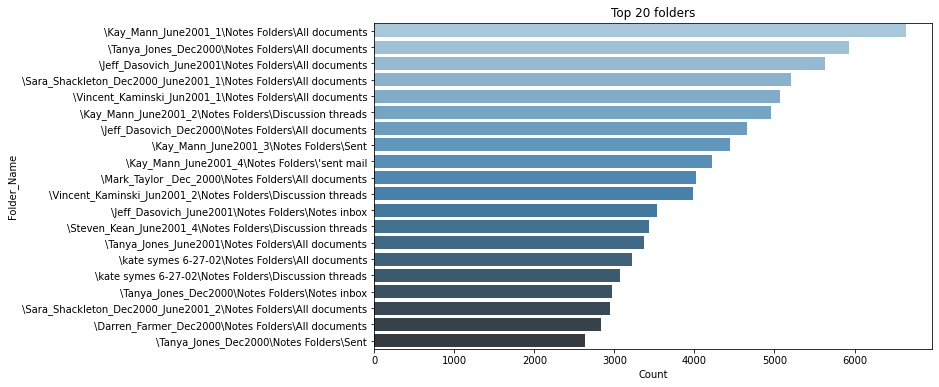

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x='count', y='folder_name', data=unique_emails.iloc[:20, :], palette="Blues_d")
plt.title("Top 20 folders")
plt.xlabel("Count")
plt.ylabel("Folder_Name")
plt.show()

In [ ]:
top_20 = pd.DataFrame(df['employee'].value_counts()[:20])
top_20.reset_index(inplace=True)
top_20.columns = ["Employee_name", "Counts"]
top_20

,Employee_name,Counts
0,kaminski-v,28465
1,dasovich-j,28234
2,kean-s,25351
3,mann-k,23381
4,jones-t,19950
5,shackleton-s,18687
6,taylor-m,13875
7,farmer-d,13032
8,germany-c,12436
9,beck-s,11830


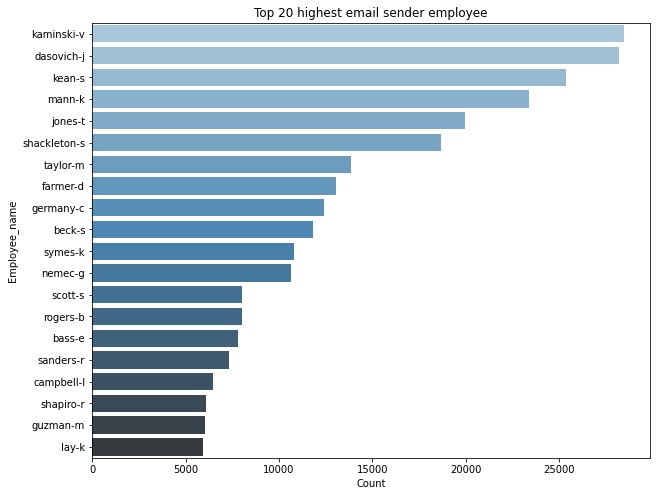

In [ ]:
plt.figure(figsize=(10,8))

sns.barplot(y="Employee_name", x="Counts", data=top_20, palette="Blues_d")
plt.title("Top 20 highest email sender employee")
plt.xlabel("Count")
plt.ylabel("Employee_name")
plt.show()

In [ ]:
import datetime
from dateutil import parser

# this is sample example
x = parser.parse("Fri, 4 May 2001 13:51:00 -0700 (PDT)")
print(x.strftime("%d-%m-%Y %H:%M:%S"))

04-05-2001 13:51:00


In [ ]:
def change_type(dates):
    column = []

    for date in dates:
        column.append(parser.parse(date).strftime("%d-%m-%Y %H:%M:%S"))
    return column

df['date'] = change_type(df['date'])
df.head(2)

,file,message,date,subject,X-Folder,X-From,X-To,body,employee
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...,14-05-2001 16:39:00,,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Phillip K Allen,Tim Belden <Tim Belden/Enron@EnronXGate>,Here is our forecast\n\n,allen-p
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...,04-05-2001 13:51:00,Re:,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Phillip K Allen,John J Lavorato <John J Lavorato/ENRON@enronXg...,Traveling to have a business meeting takes the...,allen-p


In [ ]:
print(df['X-Folder'][0])

# we only want last folder name
df['X-Folder'][0].split("\\")[-1]

\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Sent Mail


"'Sent Mail"

In [ ]:
def preprocess_folder(folders):
    column = []
    for folder in folders:
        if (folder is None or folder == ""):
            column.append(np.nan)
        else:
            column.append(folder.split("\\")[-1].lower())
    return column

df['X-Folder'] = preprocess_folder(df['X-Folder'])
df.head(2)

,file,message,date,subject,X-Folder,X-From,X-To,body,employee
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...,14-05-2001 16:39:00,,'sent mail,Phillip K Allen,Tim Belden <Tim Belden/Enron@EnronXGate>,Here is our forecast\n\n,allen-p
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...,04-05-2001 13:51:00,Re:,'sent mail,Phillip K Allen,John J Lavorato <John J Lavorato/ENRON@enronXg...,Traveling to have a business meeting takes the...,allen-p


In [ ]:
# count unique folders
print("Unique Foldes: ", len(df['X-Folder'].unique()))

# view some of them
df['X-Folder'].unique()[0:20]

Unique Foldes:  1782


array(["'sent mail", 'all documents', 'contacts', 'deleted items',
       'discussion threads', 'inbox', 'notes inbox', 'sent items', 'sent',
       'straw', '2000 conference', 'active international', 'avaya', 'bmc',
       'bridge', 'bristol babcock', 'colleen koenig', 'compaq',
       'computer associates', 'continental airlines'], dtype=object)

In [ ]:
def replace_empty_with_nan(subject):
    column = []
    for val in subject:
        if (val == ""):
            column.append(np.nan)
        else:
            column.append(val)
    return column

In [ ]:
df['subject'] = replace_empty_with_nan(df['subject'])
df['X-To'] = replace_empty_with_nan(df['X-To'])

In [ ]:
df.isnull().sum()

file            0
message         0
date            0
subject     19187
X-Folder       29
X-From         29
X-To         9153
body            0
employee        0
dtype: int64

In [ ]:
# calculate percentage of missing values
miss = df.isnull().sum()
miss = miss[miss>0]
miss = miss / df.shape[0]
miss

subject     0.037083
X-Folder    0.000056
X-From      0.000056
X-To        0.017690
dtype: float64

In [ ]:
# drop missing value rows
df.dropna(axis=0, inplace=True)

In [ ]:
df.isnull().sum(), df.shape

(file        0
 message     0
 date        0
 subject     0
 X-Folder    0
 X-From      0
 X-To        0
 body        0
 employee    0
 dtype: int64, (489236, 9))

In [ ]:
df.head(3)

,file,message,date,subject,X-Folder,X-From,X-To,body,employee
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...,04-05-2001 13:51:00,Re:,'sent mail,Phillip K Allen,John J Lavorato <John J Lavorato/ENRON@enronXg...,Traveling to have a business meeting takes the...,allen-p
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...,18-10-2000 03:00:00,Re: test,'sent mail,Phillip K Allen,Leah Van Arsdall,test successful. way to go!!!,allen-p
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...,31-08-2000 05:07:00,Re: Hello,'sent mail,Phillip K Allen,Greg Piper,Let's shoot for Tuesday at 11:45.,allen-p


In [ ]:
cols_to_drop = ['file','message','date','X-From','X-To','employee']

In [ ]:
df.drop(cols_to_drop, axis=1, inplace=True)

In [ ]:
df.head(100)

,subject,X-Folder,body
1,Re:,'sent mail,Traveling to have a business meeting takes the...
2,Re: test,'sent mail,test successful. way to go!!!
4,Re: Hello,'sent mail,Let's shoot for Tuesday at 11:45.
5,Re: Hello,'sent mail,"Greg,\n\n How about either next Tuesday or Thu..."
7,Re: PRC review - phone calls,'sent mail,any morning between 10 and 11:30
...,...,...,...
143,test,'sent mail,testing
144,System Meeting 7/11,'sent mail,---------------------- Forwarded by Phillip K ...
145,Natural Gas Customers,'sent mail,---------------------- Forwarded by Phillip K ...
146,Re: EXECUTIVE IMPACT COURSE,'sent mail,"Ina,\n Please sign me up for this course whene..."


In [ ]:
df.to_csv("cleaned_data.csv", index=False)

In [ ]:
import re
import string
import time
pd.set_option('display.max_rows', 50)
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df = pd.read_csv("/content/cleaned_data.csv")

# view first 5 rows of the dataframe
df.head()

,subject,X-Folder,body
0,Re:,'sent mail,Traveling to have a business meeting takes the...
1,Re: test,'sent mail,test successful. way to go!!!
2,Re: Hello,'sent mail,Let's shoot for Tuesday at 11:45.
3,Re: Hello,'sent mail,"Greg,\n\n How about either next Tuesday or Thu..."
4,Re: PRC review - phone calls,'sent mail,any morning between 10 and 11:30


In [ ]:
def remove_folders(emails, n):
    # returns the number of folders containing more than 'n' number of emails
    email_count = dict(df['X-Folder'].value_counts())
    small_folders = [key for key, val in email_count.items() if val<=n]
    emails = df.loc[~df['X-Folder'].isin(small_folders)]
    return emails

In [ ]:
n = 150
df = remove_folders(df, n)

In [ ]:
print("Total folders: ", len(df['X-Folder'].unique()))
print("df.shape: ", df.shape)

Total folders:  82
df.shape:  (460141, 3)


In [ ]:
df['text'] = df['subject'] + " " + df['body']

In [ ]:
# drop the columns 'subject' and 'body'
df.drop(['subject','body'], axis=1, inplace=True)

In [ ]:
def preprocess(x):
    # lowercasing all the words
    x = x.lower()

    # remove extra new lines
    x = re.sub(r'\n+', ' ', x)

    # removing (replacing with empty spaces actually) all the punctuations
    x = re.sub("["+string.punctuation+"]", " ", x)

    # remove extra white spaces
    x = re.sub(r'\s+', ' ', x)

    return x

In [ ]:
start = time.time()
df.loc[:,'text'] = df.loc[:, 'text'].map(preprocess)

# remove stopwords
df.loc[:, 'text'] = df.loc[:, 'text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop]))
end = time.time()
print("Execution time (sec): ",(end - start))

Execution time (sec):  421.0595188140869


In [ ]:
start = time.time()
folders_dict = dict(df['X-Folder'].value_counts().sort_values()[50:70])
data = df[df['X-Folder'].isin(folders_dict.keys())]
end = time.time()
print("Execution time (sec): ",(end - start))

Execution time (sec):  0.06976008415222168


In [ ]:
# check number of rows in the 'data' dataframe
print("Number of instances: ", data.shape[0])
data.to_csv('preprocessed.csv', index=False)

Number of instances:  13586


In [ ]:
data = pd.read_csv("preprocessed.csv")

In [ ]:
data['X-Folder'].value_counts()

logistics              1170
tw-commercial group    1150
california             1014
bill williams iii      1004
deal discrepancies      878
management              799
calendar                700
esvl                    663
tufco                   604
resumes                 599
e-mail bin              592
ces                     572
online trading          567
junk                    544
junk file               494
ooc                     473
genco-jv_ipo            465
projects                459
corporate               420
archives                419
Name: X-Folder, dtype: int64

In [ ]:
data['X-Folder'].value_counts()

logistics              1170
tw-commercial group    1150
california             1014
bill williams iii      1004
deal discrepancies      878
management              799
calendar                700
esvl                    663
tufco                   604
resumes                 599
e-mail bin              592
ces                     572
online trading          567
junk                    544
junk file               494
ooc                     473
genco-jv_ipo            465
projects                459
corporate               420
archives                419
Name: X-Folder, dtype: int64

In [ ]:
def label_encoder(data):
    class_le = LabelEncoder()
    # apply label encoder on the 'X-Folder' column
    y = class_le.fit_transform(data['X-Folder'])
    return y

In [ ]:
y = label_encoder(data)
input_data = data['text']

In [ ]:
#BAG OF WORDS
start = time.time()
vectorizer = CountVectorizer(min_df=5, max_features=5000)
X = vectorizer.fit_transform(input_data)
end = time.time()
print("Execution time (sec): ",(end - start))

Execution time (sec):  1.8553595542907715


In [ ]:
start = time.time()
X = X.toarray()
print("X.shape: ",X.shape)
end = time.time()
print("Execution time (sec): ",(end - start))

X.shape:  (13586, 5000)
Execution time (sec):  0.7646071910858154


In [ ]:
# create dataframe to store results
f1_data = {
    'Algorithm': ['Gaussian NB', 'Multinomial NB','Decision Tree','SVM','AdaBoost','ANN'],
    'BoW': ''
}
f1_df = pd.DataFrame(f1_data)

jaccard_data = {
    'Algorithm': ['Gaussian NB', 'Multinomial NB', 'Decision Tree','SVM','AdaBoost','ANN'],
    'BoW': ''
}
jacc_df = pd.DataFrame(jaccard_data)

acc_data = {
    'Algorithm': ['Gaussian NB', 'Multinomial NB','Decision Tree','SVM','AdaBoost','ANN'],
    'BoW': ''
}
acc_df = pd.DataFrame(acc_data)
acc_df

,Algorithm,BoW
0,Gaussian NB,
1,Multinomial NB,
2,Decision Tree,
3,SVM,
4,AdaBoost,
5,ANN,


In [ ]:
models = [GaussianNB(), MultinomialNB(), DecisionTreeClassifier(), LinearSVC(),
          AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=5),
         MLPClassifier(hidden_layer_sizes=(10,))]

names = ["Gaussian NB", "Multinomial NB", "Decision Tree", "SVM", "AdaBoost", "ANN"]

jacc_scores = []
acc_scores = []
f1_scores = []
exec_times = []4

for model, name in zip(models, names):
    print(name)
    start = time.time()
    scoring = {
        'acc': 'accuracy',
        'f1_mac': 'f1_macro',
        'jacc_mac': 'jaccard_macro'
    }
    scores = cross_validate(model, X, y, cv=10, n_jobs=4, scoring=scoring)
    training_time = (time.time() - start)
    print("accuracy: ", scores['test_acc'].mean())
    print("f1_score: ", scores['test_f1_mac'].mean())
    print("Jaccard_index: ", scores['test_jacc_mac'].mean())
    print("time (sec): ", training_time)
    print("\n")

    jacc_scores.append(scores['test_jacc_mac'].mean())
    acc_scores.append(scores['test_acc'].mean())
    f1_scores.append(scores['test_f1_mac'].mean())
    exec_times.append(training_time)

acc_df['BoW'] = acc_scores
jacc_df['BoW'] = jacc_scores
f1_df['BoW'] = f1_scores
acc_df['time'] = exec_times
acc_df

In [ ]:
# save the results
acc_df.to_csv("accuracy.csv", index=False)
f1_df.to_csv("f1_score.csv", index=False)
jacc_df.to_csv("jacc_score.csv", index=False)

In [ ]:
#Bag-of-Words Bigram
start = time.time()
vectorizer = CountVectorizer(min_df=5, max_features=5000, ngram_range=(2,2))
X = vectorizer.fit_transform(input_data)

X = X.toarray()
print("X.shape: ",X.shape)

end = time.time()
print("Execution time (sec): ",(end - start))

In [ ]:
models = [GaussianNB(), MultinomialNB(), DecisionTreeClassifier(), LinearSVC(),
          AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=5),
         MLPClassifier(hidden_layer_sizes=(10,))]

names = ["Gaussian NB", "Multinomial NB", "Decision Tree", "SVM", "AdaBoost", "ANN"]

jacc_scores = []
acc_scores = []
f1_scores = []
exec_times = []

for model, name in zip(models, names):
    print(name)
    start = time.time()
    scoring = {
        'acc': 'accuracy',
        'f1_mac': 'f1_macro',
        'jacc_mac': 'jaccard_macro'
    }
    scores = cross_validate(model, X, y, cv=10, n_jobs=4, scoring=scoring)
    training_time = (time.time() - start)
    print("accuracy: ", scores['test_acc'].mean())
    print("f1_score: ", scores['test_f1_mac'].mean())
    print("Jaccard_index: ", scores['test_jacc_mac'].mean())
    print("time (sec): ", training_time)
    print("\n")

    jacc_scores.append(scores['test_jacc_mac'].mean())
    acc_scores.append(scores['test_acc'].mean())
    f1_scores.append(scores['test_f1_mac'].mean())
    exec_times.append(training_time)

acc_df['BoWBi'] = acc_scores
jacc_df['BoWBi'] = jacc_scores
f1_df['BoWBi'] = f1_scores
acc_df['BoWBi_time'] = exec_times
acc_df

In [ ]:
# save the results
acc_df.to_csv("accuracy.csv", index=False)
f1_df.to_csv("f1_score.csv", index=False)
jacc_df.to_csv("jacc_score.csv", index=False)

In [ ]:
#Tf-Idf (Term Frequency - Inverse Document Frequency)
start = time.time()
vectorizer = TfidfVectorizer(min_df=5, max_features=5000)
X = vectorizer.fit_transform(input_data)

X = X.toarray()
print("X.shape: ",X.shape)

end = time.time()
print("Execution time (sec): ",(end - start))

In [ ]:
models = [GaussianNB(), MultinomialNB(), DecisionTreeClassifier(), LinearSVC(),
          AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=5),
         MLPClassifier(hidden_layer_sizes=(10,))]

names = ["Gaussian NB", "Multinomial NB", "Decision Tree", "SVM", "AdaBoost", "ANN"]

jacc_scores = []
acc_scores = []
f1_scores = []
exec_times = []

for model, name in zip(models, names):
    print(name)
    start = time.time()
    scoring = {
        'acc': 'accuracy',
        'f1_mac': 'f1_macro',
        'jacc_mac': 'jaccard_macro'
    }
    scores = cross_validate(model, X, y, cv=10, n_jobs=4, scoring=scoring)
    training_time = (time.time() - start)
    print("accuracy: ", scores['test_acc'].mean())
    print("f1_score: ", scores['test_f1_mac'].mean())
    print("Jaccard_index: ", scores['test_jacc_mac'].mean())
    print("time (sec): ", training_time)
    print("\n")

    jacc_scores.append(scores['test_jacc_mac'].mean())
    acc_scores.append(scores['test_acc'].mean())
    f1_scores.append(scores['test_f1_mac'].mean())
    exec_times.append(training_time)

acc_df['TfIdf'] = acc_scores
jacc_df['TfIdf'] = jacc_scores
f1_df['TfIdf'] = f1_scores
acc_df['TfIdf_time'] = exec_times
acc_df

In [ ]:
# save the results
acc_df.to_csv("accuracy.csv", index=False)
f1_df.to_csv("f1_score.csv", index=False)
jacc_df.to_csv("jacc_score.csv", index=False)

In [ ]:
jacc_df